<a href="https://colab.research.google.com/github/ljtaylor99/AAI-510-Final-Project/blob/main/AAI510_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### Imports

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns


#### Reading json

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Click on Mount Drive to connect to Google Drive
# Navigate to json file from dataset and replace file path
df = pd.read_json('/content/drive/MyDrive/yelp_academic_dataset_review.json',nrows = 2000000,lines=True)
df.head(5)

,review_id,user_id,business_id,stars,useful,funny,cool,text,date
0,KU_O5udG6zpxOg-VcAEodg,mh_-eMZ6K5RLWhZyISBhwA,XQfwVwDr-v0ZS3_CbbE5Xw,3,0,0,0,"If you decide to eat here, just be aware it is...",2018-07-07 22:09:11
1,BiTunyQ73aT9WBnpR9DZGw,OyoGAe7OKpv6SyGZT5g77Q,7ATYjTIgM3jUlt4UM3IypQ,5,1,0,1,I've taken a lot of spin classes over the year...,2012-01-03 15:28:18
2,saUsX_uimxRlCVr67Z4Jig,8g_iMtfSiwikVnbP2etR0A,YjUWPpI6HXG530lwP-fb2A,3,0,0,0,Family diner. Had the buffet. Eclectic assortm...,2014-02-05 20:30:30
3,AqPFMleE6RsU23_auESxiA,_7bHUi9Uuf5__HHc_Q8guQ,kxX2SOes4o-D3ZQBkiMRfA,5,1,0,1,"Wow! Yummy, different, delicious. Our favo...",2015-01-04 00:01:03
4,Sx8TMOWLNuJBWer-0pcmoA,bcjbaE6dDog4jkNY91ncLQ,e4Vwtrqf-wpJfwesgvdgxQ,4,1,0,1,Cute interior and owner (?) gave us tour of up...,2017-01-14 20:54:15


#### Basic EDA

In [ ]:
df.columns

Index(['review_id', 'user_id', 'business_id', 'stars', 'useful', 'funny',
       'cool', 'text', 'date'],
      dtype='object')

In [ ]:
df.isnull().sum()

review_id      0
user_id        0
business_id    0
stars          0
useful         0
funny          0
cool           0
text           0
date           0
dtype: int64

In [ ]:
df.describe(include='all')

<ipython-input-6-174ba9bf1a5c>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df.describe(include='all')


,review_id,user_id,business_id,stars,useful,funny,cool,text,date
count,2000000,2000000,2000000,2.000000e+06,2.000000e+06,2.000000e+06,2.000000e+06,2000000,2000000
unique,2000000,895930,45055,NaN,NaN,NaN,NaN,1996202,1991307
top,KU_O5udG6zpxOg-VcAEodg,_BcWyKQL16ndpBdggh2kNA,VQcCL9PiNL_wkGf-uF3fjg,NaN,NaN,NaN,NaN,DO NOT PARK HERE!\nthey are too quick to boot ...,2019-05-08 23:38:13
freq,1,894,4706,NaN,NaN,NaN,NaN,6,4
first,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2005-03-01 16:57:17
last,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022-01-19 19:47:59
mean,NaN,NaN,NaN,3.766570e+00,1.145340e+00,3.195710e-01,4.794245e-01,NaN,NaN
std,NaN,NaN,NaN,1.462870e+00,2.909354e+00,1.641546e+00,1.925800e+00,NaN,NaN
min,NaN,NaN,NaN,1.000000e+00,-1.000000e+00,0.000000e+00,0.000000e+00,NaN,NaN
25%,NaN,NaN,NaN,3.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,NaN,NaN


In [ ]:
# Value counts for different businesses
df['business_id'].value_counts()

VQcCL9PiNL_wkGf-uF3fjg    4706
GBTPC53ZrG1ZBY3DT8Mbcw    4661
_C7QiQQc47AOEv4PE3Kong    4440
qb28j-FNX1_6xm7u372TZA    3561
DcBLYSvOuWcNReolRVr12A    3217
                          ... 
0U5d1K0p0u9e_NmX7U3FUA       1
qKjOn_PJQIudpQpoolB0bw       1
dGLx7Ls5DQtlG0sLcZ0DZQ       1
6BJ4LYa42I-gBz9IhhidYg       1
AFU5ZlFCYA0_Eqw5MlqJOg       1
Name: business_id, Length: 45055, dtype: int64

<Axes: title={'center': 'Distribution of Star Ratings'}, xlabel='Number of Stars', ylabel='Count'>

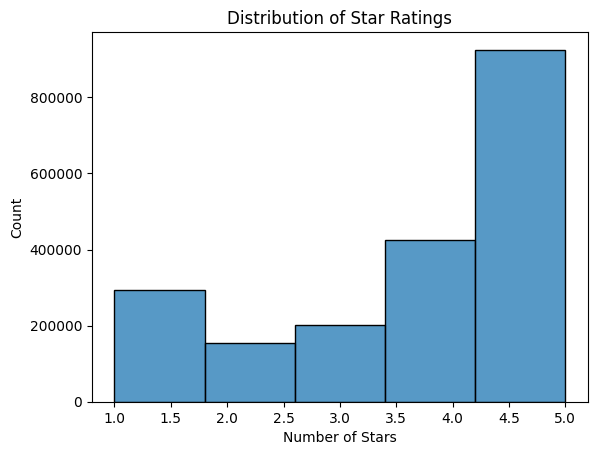

In [ ]:
# Plot distribution of stars
plt.xlabel('Number of Stars')
plt.title('Distribution of Star Ratings')
sns.histplot(df['stars'],bins = 5)